In [27]:
import numpy as np
import keras
from tensorflow.python.keras import backend as K
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Activation
from tensorflow.python.keras.layers import Conv2D
from tensorflow.python.keras.layers import MaxPooling2D
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import ZeroPadding2D
from tensorflow.python.keras.layers import Convolution2D
from tensorflow.python.keras.layers.core import Dense, Flatten, Dropout
from keras.optimizers import Adam, SGD
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.layers.normalization import BatchNormalization
from tensorflow.python.keras.layers.convolutional import *
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
%matplotlib inline

In [2]:
train_dir = 'train'
valid_dir = 'val'
test_dir = 'test'

In [4]:
train_batches = ImageDataGenerator().flow_from_directory(train_dir, target_size=(64, 64), classes=['NORMAL', 'PNEUMONIA'], batch_size=32)
valid_batches = ImageDataGenerator().flow_from_directory(valid_dir, target_size=(64, 64), classes=['NORMAL', 'PNEUMONIA'], batch_size=4)
test_batches = ImageDataGenerator().flow_from_directory(test_dir, target_size=(64,64), classes=['NORMAL', 'PNEUMONIA'], batch_size=32)

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


## Model 1

In [5]:
# Model 1: Basic CNN
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(64, 64, 3)),
    Flatten(),
    Dense(2, activation='softmax')
])

In [6]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
model_1 = model.fit(train_batches, steps_per_epoch=163, 
         epochs=10,
         validation_data=valid_batches,
         validation_steps=4)

Epoch 1/10
163/163 [==============================] - 103s 632ms/step - loss: 0.0564 - accuracy: 0.9891 - val_loss: 1.4273 - val_accuracy: 0.7500
Epoch 2/10
163/163 [==============================] - 102s 628ms/step - loss: 0.0889 - accuracy: 0.9868 - val_loss: 0.2328 - val_accuracy: 0.9375
Epoch 3/10
163/163 [==============================] - 105s 642ms/step - loss: 0.0364 - accuracy: 0.9927 - val_loss: 2.6256 - val_accuracy: 0.8125
Epoch 4/10
163/163 [==============================] - 112s 687ms/step - loss: 0.0523 - accuracy: 0.9910 - val_loss: 2.9663 - val_accuracy: 0.7500
Epoch 5/10
163/163 [==============================] - 114s 699ms/step - loss: 0.0616 - accuracy: 0.9879 - val_loss: 3.9485 - val_accuracy: 0.6875
Epoch 6/10
163/163 [==============================] - 116s 711ms/step - loss: 0.1104 - accuracy: 0.9864 - val_loss: 3.1045 - val_accuracy: 0.8125
Epoch 7/10
163/163 [==============================] - 115s 706ms/step - loss: 0.1123 - accuracy: 0.9829 - val_loss: 6.5131 -

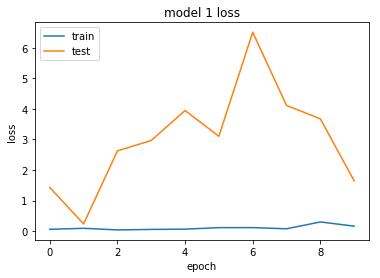

In [45]:
plt.plot(model_1.history['loss'])
plt.plot(model_1.history['val_loss'])
plt.title('model 1 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

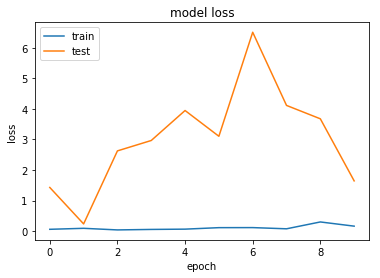

In [17]:
plt.plot(model_1.history['loss'])
plt.plot(model_1.history['val_loss'])
plt.title('model 1 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [65]:
test_imgs, test_labels = next(test_batches)

In [71]:
test_labels = test_labels[:,0]
test_labels

array([0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1.,
       0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1.],
      dtype=float32)

In [72]:
model_1_preds = model.predict(test_batches, steps=1, verbose=0)
model_1_preds

array([[0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 9.9999660e-01],
       [0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       [7.1954484e-32, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       [2.4709270e-32, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 1.

In [73]:
model_1_preds = np.round(model_1_preds)
model_1_preds

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [74]:
cm = confusion_matrix(test_labels, model_1_preds[:,0])

In [75]:
def plot_confusion_matrix(cm, classes,
                         normalize=False,
                         title='Confusion matrix',
                         cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float')/ cm.sum(axis=1)[:,np.newaxis]
        print('Normalized confusion matrix')
    else:
        print('Confusion matrix, without normalization')
    
    print(cm)
    
    thresh = cm.max() /2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                horizontalalignment='center',
                color='white' if cm[i, j] > thresh else 'black')
        
        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[17  0]
 [15  0]]


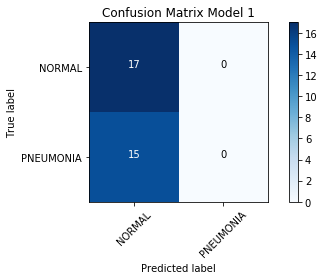

In [76]:
cm_plot_labels=['NORMAL', 'PNEUMONIA']
plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix Model 1')

## Model 2

In [82]:
# Model 2 Adding MaxPooling2D and 2nd convolution layer
model_2 = Sequential()

# Step 1 - Convolution
model_2.add(Conv2D(32, (3,3), input_shape=(64, 64, 3), activation='relu'))

# Step 2 - Pooling
model_2.add(MaxPooling2D(pool_size=(2,2)))

# Adding a second convolution layer
model_2.add(Conv2D(32, (3,3), activation='relu'))
model_2.add(MaxPooling2D(pool_size=(2,2)))

model_2.add(Conv2D(32, (3,3), activation='relu'))
model_2.add(MaxPooling2D(pool_size=(2,2)))

#Step 3 - Flattening
model_2.add(Flatten())

#Step 4 - Full connection
model_2.add(Dense(units=128, activation='relu'))
model_2.add(Dense(2, activation='sigmoid'))

# Compiling the CNN
model_2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [83]:
model_2 = model_2.fit(train_batches, steps_per_epoch=163, 
         epochs=10,
         validation_data=valid_batches,
         validation_steps=4)

Epoch 1/10
163/163 [==============================] - 108s 660ms/step - loss: 1.0391 - accuracy: 0.8660 - val_loss: 0.4678 - val_accuracy: 0.7500
Epoch 2/10
163/163 [==============================] - 110s 676ms/step - loss: 0.1407 - accuracy: 0.9494 - val_loss: 0.3137 - val_accuracy: 0.8750
Epoch 3/10
163/163 [==============================] - 122s 746ms/step - loss: 0.1126 - accuracy: 0.9618 - val_loss: 0.1536 - val_accuracy: 1.0000
Epoch 4/10
163/163 [==============================] - 123s 757ms/step - loss: 0.1060 - accuracy: 0.9603 - val_loss: 0.2447 - val_accuracy: 0.8750
Epoch 5/10
163/163 [==============================] - 117s 715ms/step - loss: 0.1011 - accuracy: 0.9632 - val_loss: 0.3849 - val_accuracy: 0.8125
Epoch 6/10
163/163 [==============================] - 116s 712ms/step - loss: 0.0721 - accuracy: 0.9751 - val_loss: 0.7850 - val_accuracy: 0.6875
Epoch 7/10
163/163 [==============================] - 147s 904ms/step - loss: 0.0697 - accuracy: 0.9737 - val_loss: 0.6483 -

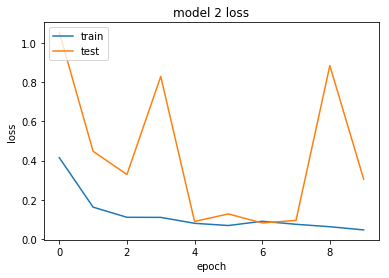

In [22]:
plt.plot(model_2.history['loss'])
plt.plot(model_2.history['val_loss'])
plt.title('model 2 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

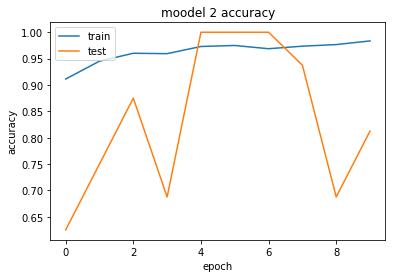

In [23]:
plt.plot(model_2.history['accuracy'])
plt.plot(model_2.history['val_accuracy'])
plt.title('moodel 2 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [77]:
test_imgs, test_labels = next(test_batches)

In [78]:
test_labels = test_labels[:,0]
test_labels

array([0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0.],
      dtype=float32)

In [81]:
model_2_preds = model_2.predict(test_batches, steps=1, verbose=0)

AttributeError: 'History' object has no attribute 'predict'

## Model 3

In [40]:
# Model 3 - Relu Activation, SGD optimizer, Dropout and Batch Normalization

input_shape=(64, 64, 3)
# Initialize model
model_3 = Sequential()

# CNN Layer 1
model_3.add(ZeroPadding2D((1,1), input_shape=input_shape))
model_3.add(Convolution2D(filters=64, kernel_size=(3,3), activation='relu', kernel_initializer='he_normal'))
model_3.add(Dropout(0.4))

# CNN Layer 2
model_3.add(ZeroPadding2D((1,1)))
model_3.add(Convolution2D(filters=64, kernel_size=(3,3), activation='relu', kernel_initializer='he_normal'))
model_3.add(MaxPooling2D((2,2), strides=(2,2)))
model_3.add(Dropout(0.4))

# Flatten the output 
model_3.add(Flatten())

# Fully Connected Layers
model_3.add(Dense(256, activation='relu', kernel_initializer='he_normal'))
model_3.add(BatchNormalization())
model_3.add(Dropout(0.5))

model_3.add(Dense(128, activation='relu', kernel_initializer='he_normal'))
model_3.add(BatchNormalization())
model_3.add(Dropout(0.5))
model_3.add(Dense(2, activation='sigmoid', kernel_initializer='he_normal'))

sgd = tf.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

print(model_3.summary())

model_3.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_12 (ZeroPaddi (None, 66, 66, 3)         0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 64, 64, 64)        1792      
_________________________________________________________________
dropout_15 (Dropout)         (None, 64, 64, 64)        0         
_________________________________________________________________
zero_padding2d_13 (ZeroPaddi (None, 66, 66, 64)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 64, 64, 64)        36928     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 32, 32, 64)        0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 32, 32, 64)      

In [41]:
model_3 = model_3.fit(train_batches, steps_per_epoch=163, 
         epochs=10,
         validation_data=valid_batches,
         validation_steps=4)

Epoch 1/10
163/163 [==============================] - 185s 1s/step - loss: 0.3498 - accuracy: 0.8668 - val_loss: 0.7099 - val_accuracy: 0.6875
Epoch 2/10
163/163 [==============================] - 183s 1s/step - loss: 0.2174 - accuracy: 0.9174 - val_loss: 2.2170 - val_accuracy: 0.5000
Epoch 3/10
163/163 [==============================] - 204s 1s/step - loss: 0.1962 - accuracy: 0.9254 - val_loss: 2.0216 - val_accuracy: 0.5000
Epoch 4/10
163/163 [==============================] - 213s 1s/step - loss: 0.1834 - accuracy: 0.9260 - val_loss: 3.1105 - val_accuracy: 0.5000
Epoch 5/10
163/163 [==============================] - 219s 1s/step - loss: 0.1798 - accuracy: 0.9323 - val_loss: 1.9180 - val_accuracy: 0.5625
Epoch 6/10
163/163 [==============================] - 1194s 7s/step - loss: 0.1683 - accuracy: 0.9363 - val_loss: 3.6624 - val_accuracy: 0.5000
Epoch 7/10
163/163 [==============================] - 193s 1s/step - loss: 0.1590 - accuracy: 0.9385 - val_loss: 3.1563 - val_accuracy: 0.500

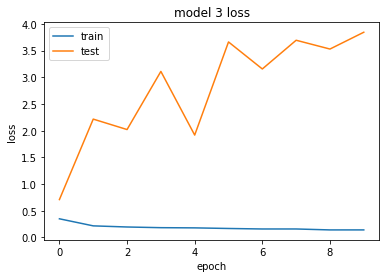

In [42]:
plt.plot(model_3.history['loss'])
plt.plot(model_3.history['val_loss'])
plt.title('model 3 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

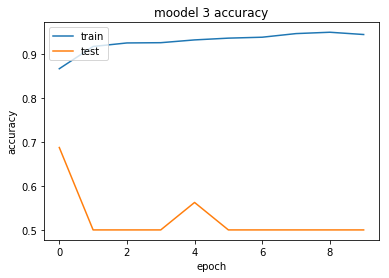

In [43]:
plt.plot(model_3.history['accuracy'])
plt.plot(model_3.history['val_accuracy'])
plt.title('moodel 3 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Model 4

In [49]:
# Model 4 Relu Activation, RMSprop optimizer, Dropout, 

# Initializing the CNN
model_4 = Sequential()

# Step 1 - Convolution
model_4.add(Conv2D(32, (3,3), input_shape=(64, 64, 3), activation='relu'))
model_4.add(MaxPooling2D(pool_size=(2,2)))
model_4.add(Dropout(0.2))

# Second convolutional layer
model_4.add(Conv2D(32, (3, 3), activation = 'relu'))
model_4.add(MaxPooling2D(pool_size= (2, 2)))
model_4.add(Dropout(0.2))

# Third convolutional layer
model_4.add(Conv2D(32, (3, 3), activation='relu'))
model_4.add(MaxPooling2D(pool_size=(2, 2)))
model_4.add(Dropout(0.2))

# Flattening Layer
model_4.add(Flatten())

# Output layer
model_4.add(Dense(units=128, activation='relu'))
model_4.add(Dense(2, activation='sigmoid'))

#Compiling the model
optim = tf.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
model_4.compile(optimizer=optim, loss='binary_crossentropy', metrics=['accuracy'])

model_4.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
dropout_20 (Dropout)         (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_21 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 12, 12, 32)      

In [50]:
model_4 = model_4.fit(train_batches, steps_per_epoch=163, 
         epochs=10,
         validation_data=valid_batches,
         validation_steps=4)

Epoch 1/10
163/163 [==============================] - 111s 684ms/step - loss: 3.6709 - accuracy: 0.7598 - val_loss: 0.5454 - val_accuracy: 0.6875
Epoch 2/10
163/163 [==============================] - 116s 710ms/step - loss: 0.4641 - accuracy: 0.8378 - val_loss: 0.4811 - val_accuracy: 0.6875
Epoch 3/10
163/163 [==============================] - 122s 751ms/step - loss: 0.3310 - accuracy: 0.8779 - val_loss: 0.5663 - val_accuracy: 0.5625
Epoch 4/10
163/163 [==============================] - 118s 724ms/step - loss: 0.2940 - accuracy: 0.8995 - val_loss: 0.5229 - val_accuracy: 0.6875
Epoch 5/10
163/163 [==============================] - 112s 687ms/step - loss: 0.2258 - accuracy: 0.9224 - val_loss: 0.3256 - val_accuracy: 0.8125
Epoch 6/10
163/163 [==============================] - 116s 709ms/step - loss: 0.2284 - accuracy: 0.9233 - val_loss: 0.3541 - val_accuracy: 0.8125
Epoch 7/10
163/163 [==============================] - 115s 705ms/step - loss: 0.2075 - accuracy: 0.9279 - val_loss: 0.3582 -

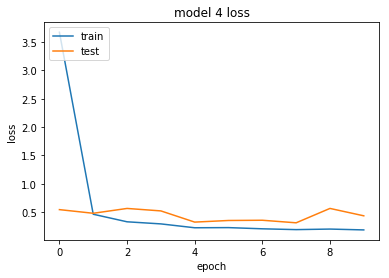

In [51]:
plt.plot(model_4.history['loss'])
plt.plot(model_4.history['val_loss'])
plt.title('model 4 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

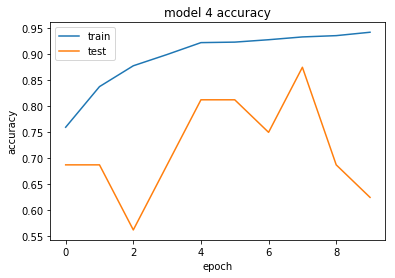

In [53]:
plt.plot(model_4.history['accuracy'])
plt.plot(model_4.history['val_accuracy'])
plt.title('model 4 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()